In [1]:
import requests

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
response = requests.get(url)

# Guardar el archivo localmente
with open("laptops.csv", "wb") as file:
    file.write(response.content)

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#First, we'll normalize the names of the columns:
import pandas as pd
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
#I'll take a look at the data
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [10]:
#Now, instead of 'Final Price', we have 'final_price'.
#Next, use only the following columns:
# 'ram',
# 'storage',
# 'screen',
# 'final_price'
df=df[["ram","storage","screen","final_price"]]

#Take a peek into the columns used
print("Head of DataFrame:")
print(df.head())

print("\nTail of DataFrame:")
print(df.tail())

Head of DataFrame:
   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01

Tail of DataFrame:
      ram  storage  screen  final_price
2155   16     1000    17.3      2699.99
2156   16     1000    17.3      2899.99
2157   32     1000    17.3      3399.99
2158   16     1000    13.4      1899.99
2159   16      256    13.4      1699.99


In [11]:
# Question 1
# There's one column with missing values. What is it?
df.isnull().sum()

#screen is the column with missing values


ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [12]:
# Question 2
# What's the median (50% percentile) for variable 'ram'?
# Calculate the 50th percentile (median) of column 'ram'
percentile_50 = df['ram'].quantile(0.50)

print("50th percentile (median) of column 'ram':", percentile_50)
#The 05th percentile is 16.0

50th percentile (median) of column 'ram': 16.0


In [61]:
# Prepare and split the dataset
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
import numpy as np
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [87]:
#Question 3-1 (Fill missing values with 0)
#We need to deal with missing values for the column from Q1.
#create copy of laptopts Dataframe
df0=df.copy().fillna(0)


#Split data
np.random.seed(42)

n = len(df0)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df0_shuffled = df0.iloc[idx]

df0_train = df0_shuffled.iloc[:n_train].copy()
df0_val = df0_shuffled.iloc[n_train:n_train+n_val].copy()
df0_test = df0_shuffled.iloc[n_train+n_val:].copy()




In [88]:
y_train_orig = df0_train.final_price.values
y_val_orig = df0_val.final_price.values
y_test_orig = df0_test.final_price.values

y_train = np.log1p(df0_train.final_price.values)
y_val = np.log1p(df0_val.final_price.values)
y_test = np.log1p(df0_test.final_price.values)

del df0_train['final_price']
del df0_val['final_price']
del df0_test['final_price']


In [89]:

base = ["ram","storage","screen",]
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [90]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [91]:
X_train = prepare_X(df0_train)
w_0, w = train_linear_regression(X_train, y_train)

In [92]:
y_pred = w_0 + X_train.dot(w)

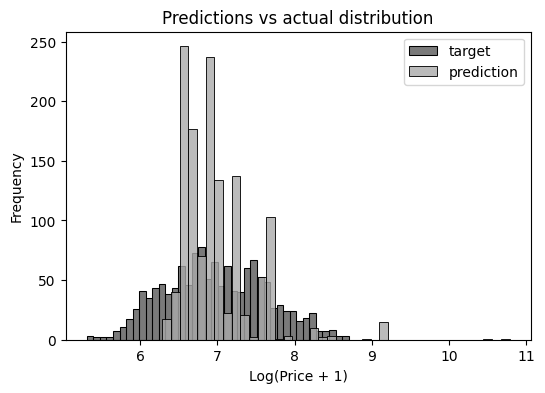

In [93]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [94]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [95]:
rmse(y_train, y_pred)

0.44632651855038796

In [96]:
X_val = prepare_X(df0_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4288635315474407

In [97]:
#Question 3-1 (Fill missing values with mean)
#We need to deal with missing values for the column from Q1.
#create copy of laptopts Dataframe

mean_ram=df["screen"].mean()
dfm=df.copy().fillna(mean_ram)

dfm.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [98]:
#Split data
np.random.seed(42)

n = len(dfm)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

dfm_shuffled = dfm.iloc[idx]

dfm_train = dfm_shuffled.iloc[:n_train].copy()
dfm_val = dfm_shuffled.iloc[n_train:n_train+n_val].copy()
dfm_test = dfm_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = dfm_train.final_price.values
y_val_orig = dfm_val.final_price.values
y_test_orig = dfm_test.final_price.values

y_train = np.log1p(dfm_train.final_price.values)
y_val = np.log1p(dfm_val.final_price.values)
y_test = np.log1p(dfm_test.final_price.values)
del dfm_train['final_price']
del dfm_val['final_price']
del dfm_test['final_price']



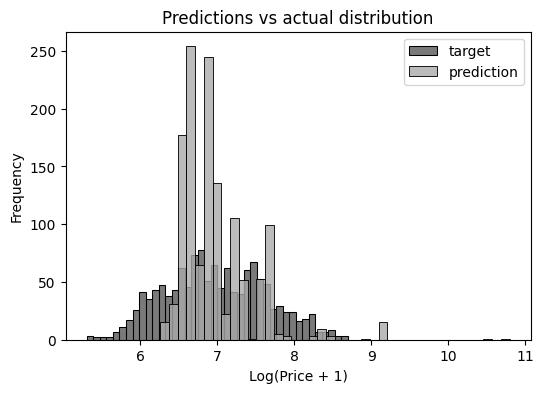

In [99]:
X_train = prepare_X(dfm_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [100]:
rmse(y_train, y_pred)

0.4460859169570135

In [101]:
X_val = prepare_X(dfm_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.43117775188925006

In [102]:
# Question 4
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]



In [107]:
X_train = prepare_X(df0_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.44632651855038796
val 0.4288635315474407


In [109]:
X_train = prepare_X(df0_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4463268765168426
val 0.4288516360534068


In [110]:
X_train = prepare_X(df0_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.4463617286354735
val 0.42877560097076367


In [111]:
X_train = prepare_X(df0_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=1)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.4493237086215199
val 0.43059329897434


In [112]:
X_train = prepare_X(df0_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=5)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.4865639226256172
val 0.46320952575805846


In [113]:
X_train = prepare_X(df0_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=10)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.5348065324681499
val 0.5075657769236878


In [114]:
X_train = prepare_X(df0_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=100)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.7118451710245154
val 0.6735026061725873


In [125]:
#Question 5
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_values=[]
for seed in seeds:
    np.random.seed(seed)
    n = len(dfm)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df0_shuffled = df0.iloc[idx]

    df0_train = df0_shuffled.iloc[:n_train].copy()
    df0_val = df0_shuffled.iloc[n_train:n_train+n_val].copy()
    df0_test = df0_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df0_train.final_price.values
    y_val_orig = df0_val.final_price.values
    y_test_orig = df0_test.final_price.values

    y_train = np.log1p(df0_train.final_price.values)
    y_val = np.log1p(df0_val.final_price.values)
    y_test = np.log1p(df0_test.final_price.values)

    X_train = prepare_X(df0_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    X_val = prepare_X(df0_val)
    y_pred = w_0 + X_val.dot(w)
    
    rmse_values.append( rmse(y_val, y_pred))

In [123]:
print(rmse_values)
print(np.std(rmse_values   ))

[0.43004215694157966, 0.4520794495247247, 0.44626255742365795, 0.4464515565727137, 0.41998054193642287, 0.4254576323418793, 0.4488322872387827, 0.43091598759046573, 0.4428849183283857, 0.40840334262398503]
0.01366859823825951
